In [8]:
# !pip install jupyter ipykernel pandas numpy matplotlib seaborn scikit-learn openpyxl 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [10]:
df = pd.read_excel('data\Assignment Data Scientist.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_7296\1324184246.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_excel('data\Assignment Data Scientist.xlsx')


In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8404 entries, 0 to 8403
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Locality       8158 non-null   str   
 1   Quarter        8152 non-null   str   
 2   Price Range    7536 non-null   object
 3   Average Price  7536 non-null   object
 4   Q-o-Q          6941 non-null   object
 5   Growth Type    197 non-null    object
 6   City           8393 non-null   str   
 7   Type           8175 non-null   str   
 8   Unnamed: 8     198 non-null    str   
dtypes: object(4), str(5)
memory usage: 591.0+ KB


In [12]:
df.sample(5)

,Locality,Quarter,Price Range,Average Price,Q-o-Q,Growth Type,City,Type,Unnamed: 8
4882,Mira Road Area,Jul-Sep 2019,"6,909-9,730",8319,0.02,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
7105,Tilak Nagar Chembur,Oct-Dec 2022,"13,489-21,634",17562,0.04,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
2983,Jogeshwari East,Oct-Dec 2019,NaN,NaN,NaN,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
5903,Prabhadevi,Apr-Jun 2024,"34,351-59,768",47060,0.03,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
5284,Nalasopara East,Jan-Mar 2023,"3,953-6,374",5163,0.04,NaN,Mumbai,Residential - Multi Storey Apartment,NaN


In [13]:
print("Growth Type: ", df['Growth Type'].value_counts())
print("Type: ", df['Type'].value_counts())
print("Locality: ", df['Locality'].nunique())

Growth Type:  Growth Type
0.02     44
0.01     18
0.04     16
0.03      9
0.07      6
         ..
0.025     1
0.023     1
0.019     1
0.015     1
0.014     1
Name: count, Length: 74, dtype: int64
Type:  Type
Residential - Multi Storey Apartment    7971
Residential                              204
Name: count, dtype: int64
Locality:  325


In [14]:
df["Price Range"].isnull().sum()
df[df["Average Price"].isnull()]

,Locality,Quarter,Price Range,Average Price,Q-o-Q,Growth Type,City,Type,Unnamed: 8
600,Bhandup,Apr-Jun 2024,NaN,NaN,NaN,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
601,Bhandup,Jan-Mar 2024,NaN,NaN,NaN,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
602,Bhandup,Oct-Dec 2023,NaN,NaN,NaN,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
1239,Charkop Gaon,Jul-Sep 2020,NaN,NaN,NaN,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
1240,Charkop Gaon,Apr-Jun 2020,NaN,NaN,NaN,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
...,...,...,...,...,...,...,...,...,...
8315,Miyapur Main Road,Jan-Mar,2015,NaN,2895,NaN,Hyderabad,Residential,Builder Floor Apartment
8318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8354,Nagarjuna Sagar Road,Jan-Mar,2016,NaN,1680,0.017,Hyderabad,Residential,Builder Floor Apartment
8361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(df["Average Price"].isnull().sum() , df["Price Range"].isnull().sum())
## Average Price and Price Range both missing data. dropping the rows
df.dropna(subset=["Average Price", "Price Range"], inplace=True)
df


868 868


,Locality,Quarter,Price Range,Average Price,Q-o-Q,Growth Type,City,Type,Unnamed: 8
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,-,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
...,...,...,...,...,...,...,...,...,...
8398,Secunderabad,Oct-Dec,2015,"1,796-3,063",2430,0.02,Hyderabad,Residential,Builder Floor Apartment
8399,Secunderabad,Jul-Sep,2015,"1,746-3,013",2379,NaN,Hyderabad,Residential,Builder Floor Apartment
8400,Secunderabad,Apr-Jun,2015,"1,766-3,012",2389,0.03,Hyderabad,Residential,Builder Floor Apartment
8401,Secunderabad,Jan-Mar,2015,"1,712-2,941",2326,0.01,Hyderabad,Residential,Builder Floor Apartment


In [16]:
# dropping rows with : "-" in average prince and price range
print(df[df["Average Price"] == "-"].shape, df[df["Price Range"] == "-"].shape)
df.drop(df[df["Average Price"] == "-"].index, inplace=True)
print(df[df["Average Price"] == "-"].shape, df[df["Price Range"] == "-"].shape)
df

(1127, 9) (1127, 9)
(0, 9) (0, 9)


,Locality,Quarter,Price Range,Average Price,Q-o-Q,Growth Type,City,Type,Unnamed: 8
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,-,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
...,...,...,...,...,...,...,...,...,...
8398,Secunderabad,Oct-Dec,2015,"1,796-3,063",2430,0.02,Hyderabad,Residential,Builder Floor Apartment
8399,Secunderabad,Jul-Sep,2015,"1,746-3,013",2379,NaN,Hyderabad,Residential,Builder Floor Apartment
8400,Secunderabad,Apr-Jun,2015,"1,766-3,012",2389,0.03,Hyderabad,Residential,Builder Floor Apartment
8401,Secunderabad,Jan-Mar,2015,"1,712-2,941",2326,0.01,Hyderabad,Residential,Builder Floor Apartment


In [17]:
print(df[df["City"]=="Hyderabad"])
# city Hydrabad is out of scope for the requirement. dropping hydrabad and keeping only mumbai.
df.drop(df[df["City"]=="Hyderabad"].index, inplace=True)
df

          Locality  Quarter Price Range Average Price Q-o-Q Growth Type  \
8190    Gachibowli  Oct-Dec        2024     6263-9362  7812        0.04   
8191    Gachibowli  Jul-Sep        2024     6054-8931  7493        0.04   
8192    Gachibowli  Apr-Jun        2024     6424-9188  7806        0.05   
8193    Gachibowli  Jan-Mar        2024     5991-8937  7464       0.065   
8194    Gachibowli      NaN        2023     6210-8792  7501        0.08   
...            ...      ...         ...           ...   ...         ...   
8398  Secunderabad  Oct-Dec        2015   1,796-3,063  2430        0.02   
8399  Secunderabad  Jul-Sep        2015   1,746-3,013  2379         NaN   
8400  Secunderabad  Apr-Jun        2015   1,766-3,012  2389        0.03   
8401  Secunderabad  Jan-Mar        2015   1,712-2,941  2326        0.01   
8402  Secunderabad  Oct-Dec        2014   1,802-2,891  2347        0.04   

           City         Type               Unnamed: 8  
8190  Hyderabad  Residential  Builder Floor

,Locality,Quarter,Price Range,Average Price,Q-o-Q,Growth Type,City,Type,Unnamed: 8
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,-,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
...,...,...,...,...,...,...,...,...,...
8188,Yari Road,Jul-Sep 2018,"17,959-28,602",23280,0.07,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
8215,Gachibowli,Jul-Sep,2018,3073-4338,3705.33,0.021,NaN,Residential,Builder Floor Apartment
8330,Nagarjuna Sagar Road,Jan-Mar,2022,"2,600-4,410",3510,0.04,NaN,Residential,Builder Floor Apartment
8340,Nagarjuna Sagar Road,Jul-Sep,2019,"1,930-3,140",2530,0.033,NaN,Residential,Builder Floor Apartment


In [18]:
print(df[df["City"].isnull()])
# dropping city with null
df.drop(df[df["City"].isnull()].index, inplace=True)
df

                  Locality  Quarter Price Range Average Price    Q-o-Q  \
8215            Gachibowli  Jul-Sep        2018     3073-4338  3705.33   
8330  Nagarjuna Sagar Road  Jan-Mar        2022   2,600-4,410     3510   
8340  Nagarjuna Sagar Road  Jul-Sep        2019   1,930-3,140     2530   
8374          Secunderabad  Oct-Dec        2021   2,950-5,300     4125   

     Growth Type City         Type               Unnamed: 8  
8215       0.021  NaN  Residential  Builder Floor Apartment  
8330        0.04  NaN  Residential  Builder Floor Apartment  
8340       0.033  NaN  Residential  Builder Floor Apartment  
8374        0.02  NaN  Residential  Builder Floor Apartment  


,Locality,Quarter,Price Range,Average Price,Q-o-Q,Growth Type,City,Type,Unnamed: 8
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.06,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,-,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
...,...,...,...,...,...,...,...,...,...
8184,Yari Road,Jul-Sep 2019,"17,375-28,584",22979,0.03,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
8185,Yari Road,Apr-Jun 2019,"17,412-27,268",22340,0.01,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
8186,Yari Road,Jan-Mar 2019,"17,696-27,222",22459,0.04,NaN,Mumbai,Residential - Multi Storey Apartment,NaN
8187,Yari Road,Oct-Dec 2018,"17,718-29,000",23359,0.003,NaN,Mumbai,Residential - Multi Storey Apartment,NaN


In [19]:
df.shape

(6206, 9)

In [20]:
df['Growth Type'].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
# dropping 'Unnamed: 8' & "Growth Type" - data for these rows was only in Hyderabad rows, so dropping columns
df.drop(columns=['Unnamed: 8','Growth Type'], inplace=True)
df

,Locality,Quarter,Price Range,Average Price,Q-o-Q,City,Type
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.06,Mumbai,Residential - Multi Storey Apartment
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.01,Mumbai,Residential - Multi Storey Apartment
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.06,Mumbai,Residential - Multi Storey Apartment
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,-,Mumbai,Residential - Multi Storey Apartment
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.01,Mumbai,Residential - Multi Storey Apartment
...,...,...,...,...,...,...,...
8184,Yari Road,Jul-Sep 2019,"17,375-28,584",22979,0.03,Mumbai,Residential - Multi Storey Apartment
8185,Yari Road,Apr-Jun 2019,"17,412-27,268",22340,0.01,Mumbai,Residential - Multi Storey Apartment
8186,Yari Road,Jan-Mar 2019,"17,696-27,222",22459,0.04,Mumbai,Residential - Multi Storey Apartment
8187,Yari Road,Oct-Dec 2018,"17,718-29,000",23359,0.003,Mumbai,Residential - Multi Storey Apartment


In [22]:
df.isnull().sum()

Locality          0
Quarter           0
Price Range       0
Average Price     0
Q-o-Q            81
City              0
Type              0
dtype: int64

In [23]:
# replacing '-' with null and removing "%" and converting to numerical
df['Q-o-Q'] = (
    df['Q-o-Q']
    .replace('-', np.nan)  # Replace '-' with NaN first
    .astype(str)          # Convert the column to string type to ensure .str accessor works
    .str.replace('%', '', regex=False) # Remove '%' characters
)
# Finally, convert the cleaned column to numeric, coercing any non-numeric values to NaN
df['Q-o-Q'] = pd.to_numeric(df['Q-o-Q'], errors='coerce')

In [24]:
df.isnull().sum()

Locality            0
Quarter             0
Price Range         0
Average Price       0
Q-o-Q            1151
City                0
Type                0
dtype: int64

In [25]:
# Dropping City column because only Mumbai is relevant
df.drop(columns=['City'], inplace=True)
df

,Locality,Quarter,Price Range,Average Price,Q-o-Q,Type
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.060,Residential - Multi Storey Apartment
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.010,Residential - Multi Storey Apartment
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.060,Residential - Multi Storey Apartment
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,NaN,Residential - Multi Storey Apartment
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.010,Residential - Multi Storey Apartment
...,...,...,...,...,...,...
8184,Yari Road,Jul-Sep 2019,"17,375-28,584",22979,0.030,Residential - Multi Storey Apartment
8185,Yari Road,Apr-Jun 2019,"17,412-27,268",22340,0.010,Residential - Multi Storey Apartment
8186,Yari Road,Jan-Mar 2019,"17,696-27,222",22459,0.040,Residential - Multi Storey Apartment
8187,Yari Road,Oct-Dec 2018,"17,718-29,000",23359,0.003,Residential - Multi Storey Apartment


In [26]:
df.duplicated().any()
# df.duplicated().sum()
# df[df.duplicated(subset=['Locality', 'Quarter', 'Type'], keep=False)]
# df.duplicated(subset=['Locality', 'Quarter', 'Type']).sum()



np.False_

In [27]:
df["Type"].unique()
# Type column has only one type. droppoing the column
df.drop(columns=['Type'], inplace=True)
df

,Locality,Quarter,Price Range,Average Price,Q-o-Q
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.060
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.010
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.060
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,NaN
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.010
...,...,...,...,...,...
8184,Yari Road,Jul-Sep 2019,"17,375-28,584",22979,0.030
8185,Yari Road,Apr-Jun 2019,"17,412-27,268",22340,0.010
8186,Yari Road,Jan-Mar 2019,"17,696-27,222",22459,0.040
8187,Yari Road,Oct-Dec 2018,"17,718-29,000",23359,0.003


In [28]:
df.head()


,Locality,Quarter,Price Range,Average Price,Q-o-Q
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066",22666,0.06
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163",21347,0.01
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342",21591,0.06
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990",20439,NaN
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000",19750,-0.01


# EDA

In [29]:
df.info()

<class 'pandas.DataFrame'>
Index: 6206 entries, 0 to 8188
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locality       6206 non-null   str    
 1   Quarter        6206 non-null   str    
 2   Price Range    6206 non-null   object 
 3   Average Price  6206 non-null   object 
 4   Q-o-Q          5055 non-null   float64
dtypes: float64(1), object(2), str(2)
memory usage: 290.9+ KB


In [30]:
df['Average Price'] = df['Average Price'].astype(int)


In [31]:
df.info()

<class 'pandas.DataFrame'>
Index: 6206 entries, 0 to 8188
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locality       6206 non-null   str    
 1   Quarter        6206 non-null   str    
 2   Price Range    6206 non-null   object 
 3   Average Price  6206 non-null   int64  
 4   Q-o-Q          5055 non-null   float64
dtypes: float64(1), int64(1), object(1), str(2)
memory usage: 290.9+ KB


In [32]:
# df['Price Range'] = df['Price Range'].astype(int)

In [33]:
df.describe()


,Average Price,Q-o-Q
count,6206.000000,5055.000000
mean,22480.718820,0.029845
std,11395.082849,0.099932
min,3875.000000,-0.030000
25%,16086.750000,0.010000
50%,19500.000000,0.020000
75%,28000.000000,0.039000
max,68164.000000,5.000000


In [34]:
df['Locality'].nunique()

320

In [35]:
df['Quarter'].nunique()
df['Quarter'].unique()


<StringArray>
[   'Jul-Sep 2024',    'Apr-Jun 2024',    'Jan-Mar 2024',    'Oct-Dec 2023',
    'Jul-Sep 2023',    'Apr-Jun 2023',    'Jan-Mar 2023',    'Oct-Dec 2022',
    'Jul-Sep 2022',    'Apr-Jun 2022',    'Jan-Mar 2022',    'Oct-Dec 2021',
    'Jul-Sep 2021',    'Apr-Jun 2021',    'Jan-Mar 2021',    'Oct-Dec 2020',
    'Jul-Sep 2020',    'Apr-Jun 2020',    'Jan-Mar 2020',    'Oct-Dec 2019',
    'Jul-Sep 2019',    'Apr-Jun 2019',    'Jan-Mar 2019',    'Oct-Dec 2018',
    'Jul-Sep 2018', 'April-June 2021']
Length: 26, dtype: str

In [36]:
# seperating Year and quarter from Quarter column

# Extract year first
df['Year'] = df['Quarter'].str.extract(r'(\d{4})').astype(int)

# Create a mapping for quarter month ranges to numerical quarters
quarter_map = {
    'Jan-Mar': 1,
    'Apr-Jun': 2,
    'Jul-Sep': 3,
    'Oct-Dec': 4,
    'April-June': 2 # Specifically handle the 'April-June 2021' case observed in unique values
}

# Extract the quarter month range string (e.g., 'Jul-Sep') and map it to numerical quarter
df['Quarter'] = df['Quarter'].str.extract(r'([A-Za-z]+-[A-Za-z]+)').iloc[:, 0].map(quarter_map)

# Convert the numerical quarter to integer
df['Quarter'] = df['Quarter'].astype(int)
df

,Locality,Quarter,Price Range,Average Price,Q-o-Q,Year
0,90 Feet Road,3,"16,266-29,066",22666,0.060,2024
1,90 Feet Road,2,"15,531-27,163",21347,0.010,2024
2,90 Feet Road,1,"15,841-27,342",21591,0.060,2024
3,90 Feet Road,4,"14,887-25,990",20439,NaN,2023
4,90 Feet Road,3,"14,500-25,000",19750,-0.010,2023
...,...,...,...,...,...,...
8184,Yari Road,3,"17,375-28,584",22979,0.030,2019
8185,Yari Road,2,"17,412-27,268",22340,0.010,2019
8186,Yari Road,1,"17,696-27,222",22459,0.040,2019
8187,Yari Road,4,"17,718-29,000",23359,0.003,2018


In [37]:
## dropping column: Price Range
# This is not expected in input and we already have average price
df.drop(columns=['Price Range'], inplace=True)
df

,Locality,Quarter,Average Price,Q-o-Q,Year
0,90 Feet Road,3,22666,0.060,2024
1,90 Feet Road,2,21347,0.010,2024
2,90 Feet Road,1,21591,0.060,2024
3,90 Feet Road,4,20439,NaN,2023
4,90 Feet Road,3,19750,-0.010,2023
...,...,...,...,...,...
8184,Yari Road,3,22979,0.030,2019
8185,Yari Road,2,22340,0.010,2019
8186,Yari Road,1,22459,0.040,2019
8187,Yari Road,4,23359,0.003,2018


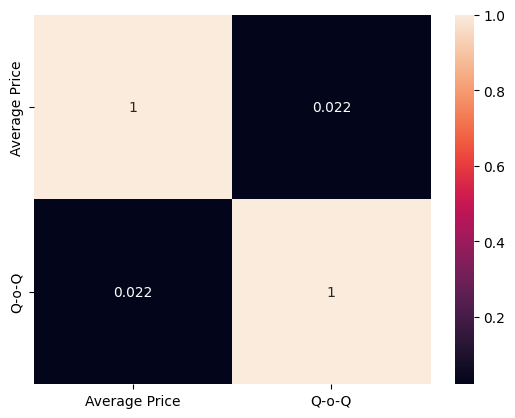

In [38]:
sns.heatmap(df[['Average Price', 'Q-o-Q']].corr(), annot=True)
plt.show()


<Axes: xlabel='Year'>

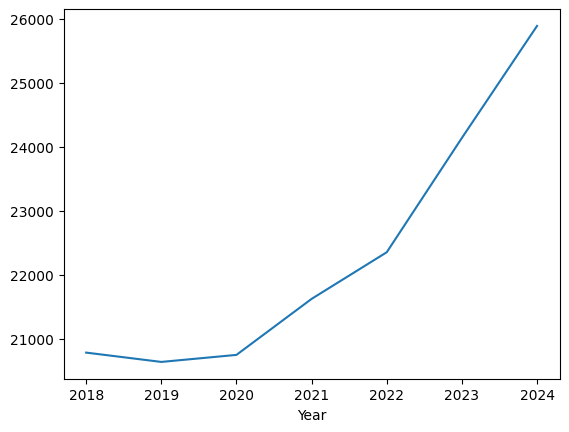

In [39]:
df.groupby('Year')['Average Price'].mean().plot()
# prices linearly(consistantly) increasing since 2020


<Axes: xlabel='Quarter'>

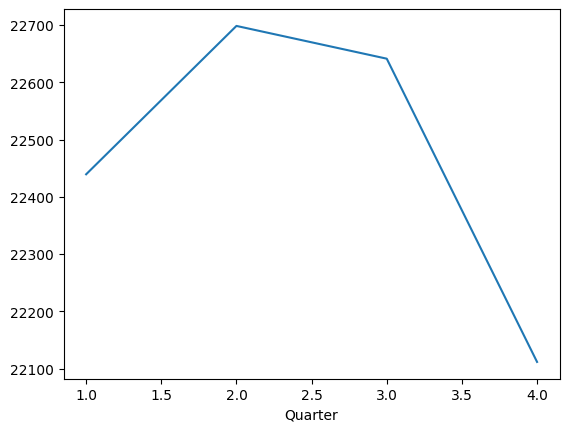

In [40]:
df.groupby('Quarter')['Average Price'].mean().plot()
# shows year end prices drops

<Axes: xlabel='Year,Quarter'>

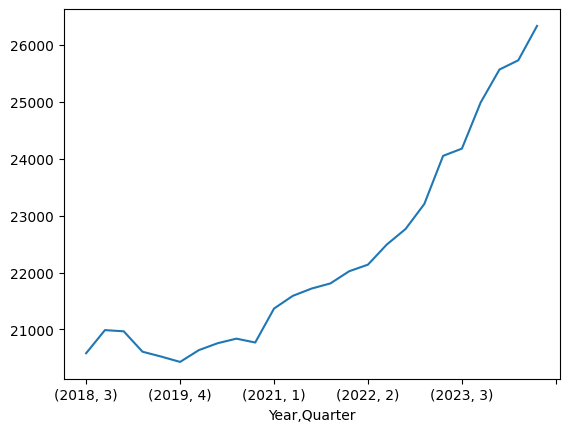

In [41]:
df.groupby(['Year', 'Quarter'])['Average Price'].mean().plot()
# quarterly and yearly

<Axes: xlabel='Year,Quarter'>

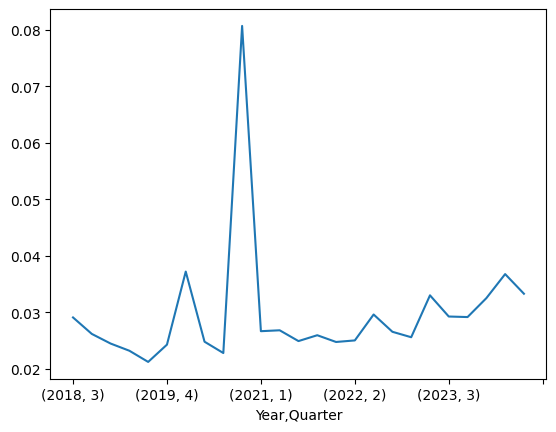

In [42]:
df.groupby(['Year', 'Quarter'])['Q-o-Q'].mean().plot()


# Outlier:
##    Average Price
##    Q-o-Q

In [43]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]


In [44]:
price_outliers = detect_outliers_iqr(df, 'Average Price')
qoq_outliers = detect_outliers_iqr(df, 'Q-o-Q')

price_outliers.shape, qoq_outliers.shape


((267, 5), (200, 5))

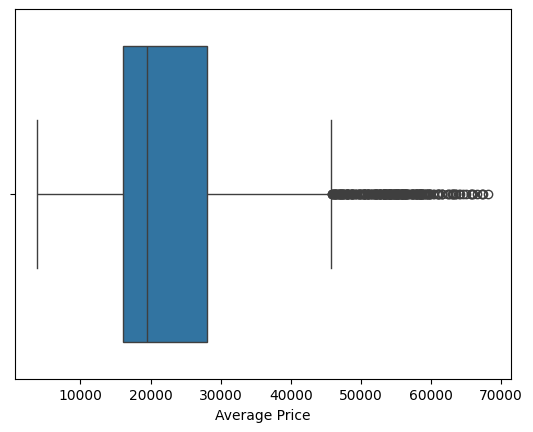

In [45]:
sns.boxplot(x=df['Average Price'])
plt.show()



In [46]:
df['Q-o-Q'].info()

<class 'pandas.Series'>
Index: 6206 entries, 0 to 8188
Series name: Q-o-Q
Non-Null Count  Dtype  
--------------  -----  
5055 non-null   float64
dtypes: float64(1)
memory usage: 97.0 KB


In [47]:
# Cap (Winsorize) for Q-o-Q
lower = df['Q-o-Q'].quantile(0.01)
upper = df['Q-o-Q'].quantile(0.99)

df['Q-o-Q'] = df['Q-o-Q'].clip(lower, upper)


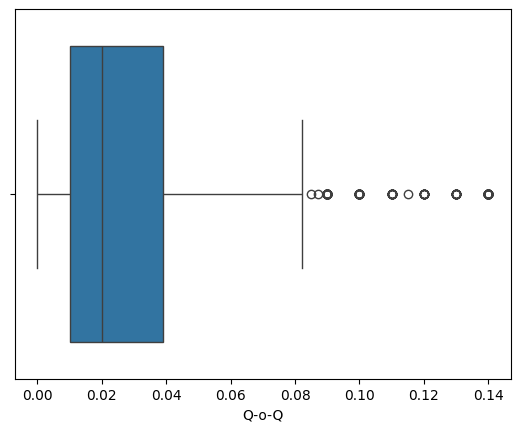

In [48]:
sns.boxplot(x=df['Q-o-Q'])
plt.show()

# Univariate and bivariate analysis

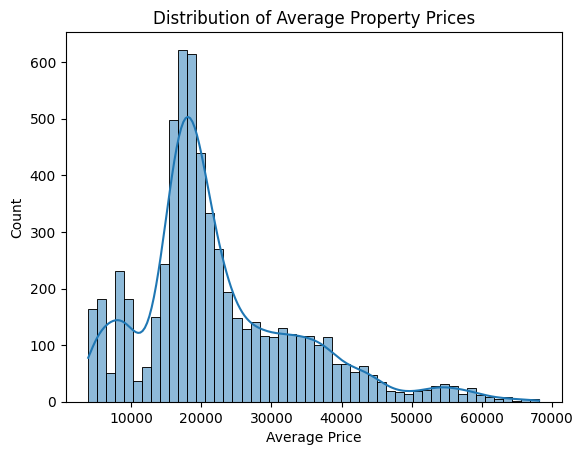

In [49]:
sns.histplot(df['Average Price'], kde=True)
plt.title('Distribution of Average Property Prices')
plt.show()


Distribution of Average Property Prices

Observation:
Distribution is right-skewed
Majority of prices lie between ₹15,000 - ₹30,000
Long tail extends up to ₹70,000+

The right-skewed distribution indicates the presence of premium localities with significantly higher prices, while most properties fall within the mid-price segment.

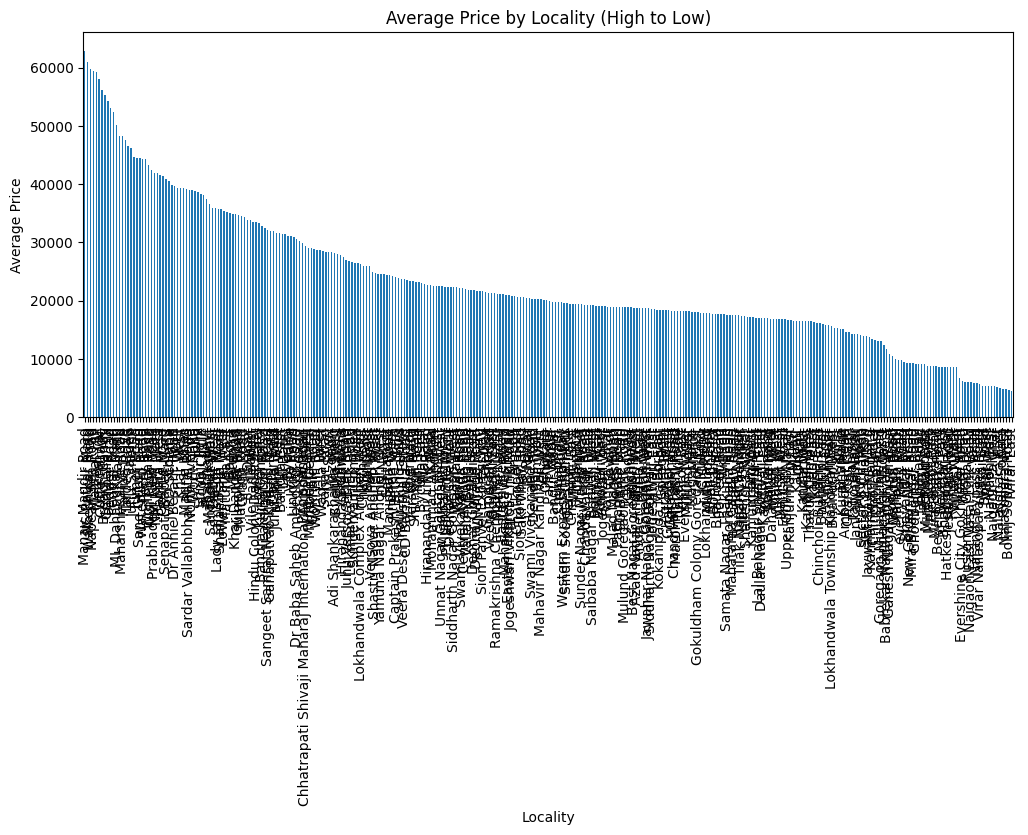

In [50]:
(
    df.groupby('Locality')['Average Price']
      .mean()
      .sort_values(ascending=False)
      .plot(kind='bar', figsize=(12,5))
)

plt.title('Average Price by Locality (High to Low)')
plt.ylabel('Average Price')
plt.show()


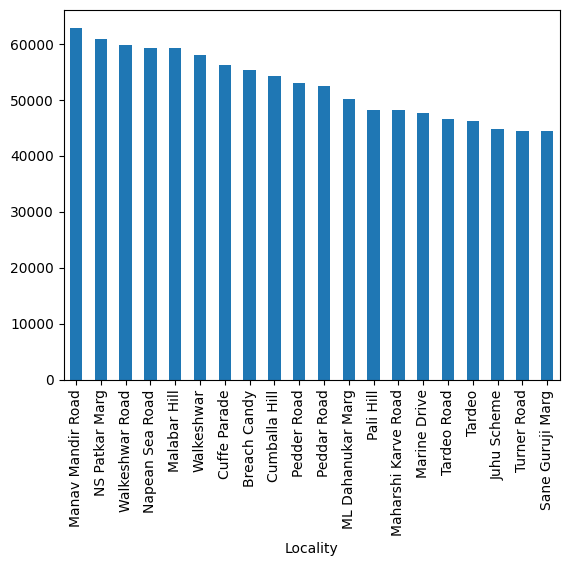

In [51]:
top_localities = (
    df.groupby('Locality')['Average Price']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

top_localities.plot(kind='bar')
plt.show()


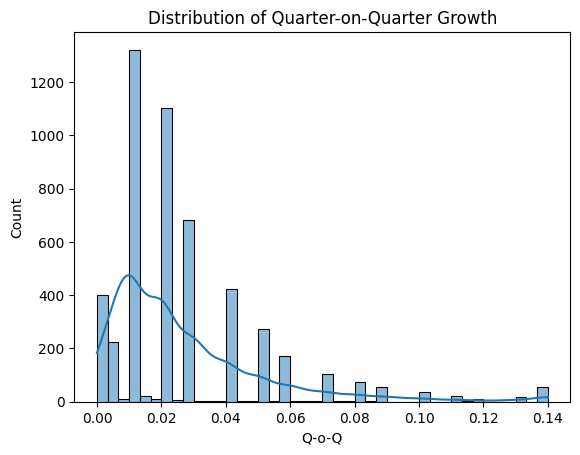

In [52]:
sns.histplot(df['Q-o-Q'], kde=True)
plt.title('Distribution of Quarter-on-Quarter Growth')
plt.show()


Distribution of Quarter-on-Quarter (Q-o-Q) Growth

Observation:
Most growth values are between 0% and 4%
Few quarters show high growth spikes (up to ~14%)
Distribution is positively skewed

Inference:
Quarter-on-quarter growth is generally modest, with occasional high-growth periods reflecting short-term market momentum or policy-driven demand.

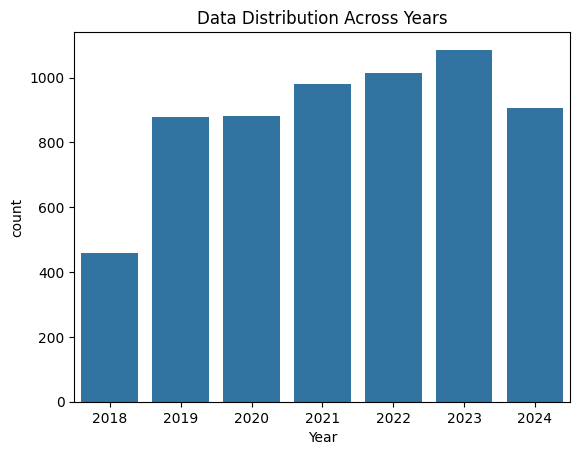

In [53]:
sns.countplot(x='Year', data=df)
plt.title('Data Distribution Across Years')
plt.show()


Year-wise Data Distribution (Count Plot)

Observation:

Increasing number of records from 2018 to 2023

Slight drop or stabilization in 2024

Inference:

The dataset has strong temporal coverage across years, ensuring reliability of trend analysis, with recent years being better represented.

#BIVARIATE ANALYSIS

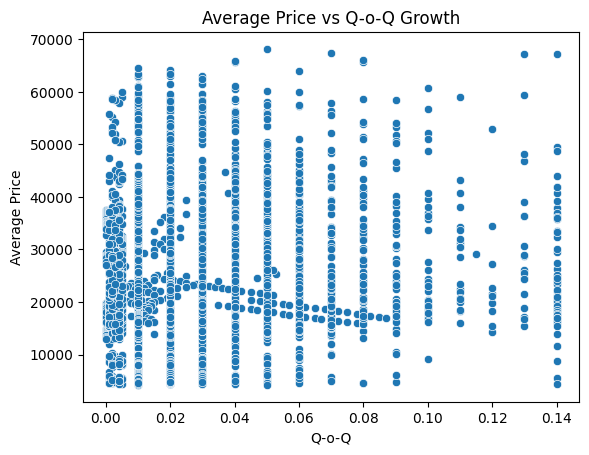

In [54]:
sns.scatterplot(x='Q-o-Q', y='Average Price', data=df)
plt.title('Average Price vs Q-o-Q Growth')
plt.show()


Average Price vs Q-o-Q Growth (Scatter Plot)

Observation:

Points are widely scattered

No clear linear pattern

High prices appear across both low and high growth values

Inference:

The weak relationship indicates that short-term growth rates do not directly depend on absolute price levels, suggesting that growth momentum is locality- and period-specific rather than price-driven.

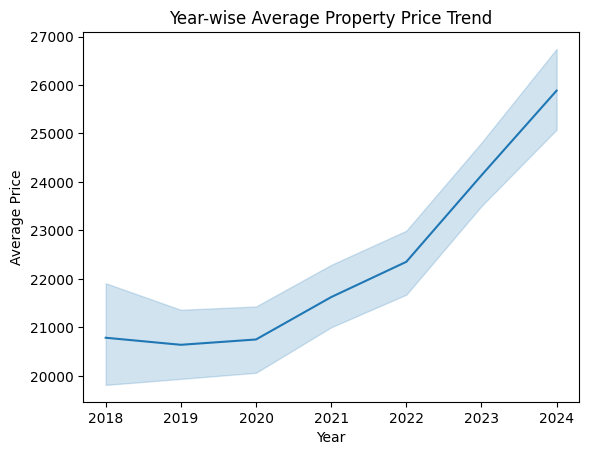

In [55]:
sns.lineplot(x='Year', y='Average Price', data=df, estimator='mean')
plt.title('Year-wise Average Property Price Trend')
plt.show()


Year-wise Average Property Price Trend

Observation:
Prices remained relatively stable between 2018–2020
Clear upward trend from 2021 onwards
Sharp increase seen in 2023–2024

Inference:

Mumbai real estate prices demonstrate long-term appreciation, with accelerated growth in recent years, likely influenced by post-pandemic recovery and increased housing demand.

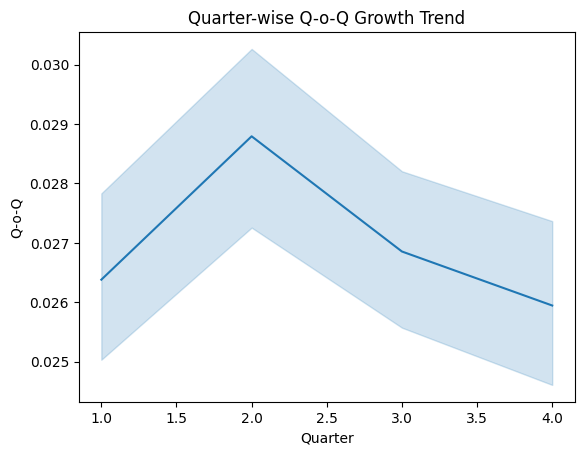

In [56]:
sns.lineplot(x='Quarter', y='Q-o-Q', data=df, estimator='mean')
plt.title('Quarter-wise Q-o-Q Growth Trend')
plt.show()


Quarter-wise Q-o-Q Growth Trend

Observation:
Growth peaks in Quarter 2 (Apr–Jun)
Slight decline observed in Q3 and Q4

Inference:

Real estate price growth shows mild seasonality, with stronger momentum during mid-year quarters, possibly driven by increased buyer activity.

##FINAL CONSOLIDATED EDA SUMMARY

“Univariate analysis revealed right-skewed property prices and predominantly low-to-moderate quarter-on-quarter growth, highlighting the presence of premium localities alongside stable market behavior. Bivariate analysis showed weak dependency between price levels and short-term growth, while temporal trends confirmed consistent long-term price appreciation with mild seasonal variations.”

#Insights on Locality Pricing:

Locality plays a critical role in price determination. Premium areas command consistently higher prices, while emerging localities exhibit stronger growth momentum, indicating potential future appreciation.

#Area (Locality) vs Price Relationship:
The analysis suggests that absolute price levels are locality-driven rather than growth-driven, highlighting the importance of location-specific factors over short-term market movements.

#Suspicious / Noteworthy Values Analysis:
The outliers :Not errors. They represent a distinct premium segment.

Localities such as Malabar Hill, Napean Sea Road, and Walkeshwar consistently appear in the highest price segment, confirming that extreme price values represent genuine premium markets rather than data anomalies. These localities were therefore retained in the analysis as valid high-value residential areas.

In [57]:
# Suspicious / Noteworthy Values Analysis
df[df['Average Price'] > 60000]['Locality'].value_counts()

Locality
Malabar Hill         9
Napean Sea Road      9
Walkeshwar           7
NS Patkar Marg       3
Walkeshwar Road      3
Breach Candy         1
Manav Mandir Road    1
Name: count, dtype: int64

##High Q-o-Q Growth Values:
Localities exhibiting exceptionally high quarter-on-quarter growth are primarily mid-priced or redevelopment-driven areas such as Wadala West, Pant Nagar, and Grant Road. These growth spikes are likely influenced by infrastructure upgrades, redevelopment activity, or lower base prices rather than sustained luxury demand.

In [58]:
# High Q-o-Q Growth Values:
df[df['Q-o-Q']> 0.12]['Locality'].value_counts()

Locality
Grant Road                     5
Bandra Kurla Complex           3
New Link Road                  3
Pant Nagar                     3
Tagore Nagar                   3
Wadala West                    3
Yari Road                      3
Byculla East                   2
Byculla West                   2
Central Avenue Road            2
Jacob Circle                   2
Oshiwara                       2
Pali Hill                      2
Vikhroli                       2
Walkeshwar Road                2
Akurli Nagar                   1
Andheri Kurla Road             1
Bhayandar West                 1
Bhoiwada                       1
Chakala                        1
Chincholi Bunder               1
Chinchpokli                    1
Dahisar East                   1
Dattapada                      1
Evershine Nagar                1
Girgaon                        1
Goregaon Mulund Link Road      1
Govandi                        1
Gulmohar Road                  1
Jawahar Nagar Goregaon West    1
J

#final data

<Axes: xlabel='Average Price', ylabel='Q-o-Q'>

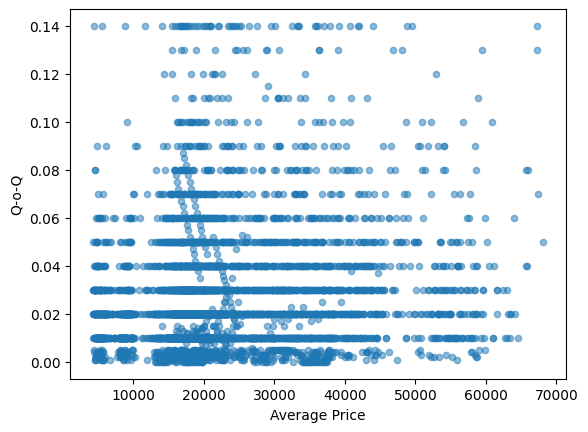

In [59]:
df.plot(kind='scatter', x='Average Price', y='Q-o-Q', alpha=0.5)

In [60]:
df

,Locality,Quarter,Average Price,Q-o-Q,Year
0,90 Feet Road,3,22666,0.060,2024
1,90 Feet Road,2,21347,0.010,2024
2,90 Feet Road,1,21591,0.060,2024
3,90 Feet Road,4,20439,NaN,2023
4,90 Feet Road,3,19750,0.000,2023
...,...,...,...,...,...
8184,Yari Road,3,22979,0.030,2019
8185,Yari Road,2,22340,0.010,2019
8186,Yari Road,1,22459,0.040,2019
8187,Yari Road,4,23359,0.003,2018


In [61]:
display(df.head())

,Locality,Quarter,Average Price,Q-o-Q,Year
0,90 Feet Road,3,22666,0.06,2024
1,90 Feet Road,2,21347,0.01,2024
2,90 Feet Road,1,21591,0.06,2024
3,90 Feet Road,4,20439,NaN,2023
4,90 Feet Road,3,19750,0.00,2023


In [62]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# le = LabelEncoder()

# # Apply Label Encoding to the 'Locality' column
# df['Locality_LabelEncoded'] = le.fit_transform(df['Locality'])

# # Drop the original 'Locality' column
# df.drop(columns=['Locality'], inplace=True)



In [63]:
df.sample(10)

,Locality,Quarter,Average Price,Q-o-Q,Year
6714,Sindhi Society Chembur,1,18883,0.04,2023
3722,Kurla West,3,17318,0.01,2023
686,Bhaudaji Road,3,14250,0.03,2021
682,Bhaudaji Road,3,15500,0.03,2022
1506,Dadar,3,33049,0.01,2022
7806,Virar West,1,5603,0.01,2023
3131,Juhu Tara Road,4,38000,NaN,2021
2232,Garodia Nagar,1,15800,0.02,2019
5308,Nalasopara West,3,5316,0.04,2023
7387,Vasai Road,4,6389,NaN,2023


ML model used - Lenear regression
(For the minimal machine learning requirement, Linear Regression was used to predict average property prices due to its simplicity, interpretability, and suitability for continuous targets.)


#Preprocessing

In [64]:
df.info()

<class 'pandas.DataFrame'>
Index: 6206 entries, 0 to 8188
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locality       6206 non-null   str    
 1   Quarter        6206 non-null   int64  
 2   Average Price  6206 non-null   int64  
 3   Q-o-Q          5055 non-null   float64
 4   Year           6206 non-null   int64  
dtypes: float64(1), int64(3), str(1)
memory usage: 290.9 KB


In [65]:
# filling nulls with mean for Q-o-Q.
df['Q-o-Q'] = df['Q-o-Q'].fillna(df['Q-o-Q'].mean())
df.info()

<class 'pandas.DataFrame'>
Index: 6206 entries, 0 to 8188
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locality       6206 non-null   str    
 1   Quarter        6206 non-null   int64  
 2   Average Price  6206 non-null   int64  
 3   Q-o-Q          6206 non-null   float64
 4   Year           6206 non-null   int64  
dtypes: float64(1), int64(3), str(1)
memory usage: 290.9 KB


In [66]:
X = df[['Year', 'Quarter', 'Q-o-Q']]
y = df['Average Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [67]:
X.head()

,Year,Quarter,Q-o-Q
0,2024,3,0.060000
1,2024,2,0.010000
2,2024,1,0.060000
3,2023,4,0.026995
4,2023,3,0.000000


#Model Training

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#Evaluation

In [69]:
#Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.043144865169275626

**R-squared (R2)**: A measure of how well the model fits the data. The model achieved an R2 score of 0.0431. This indicates that only about 4.3% of the variance in property prices can be explained by the selected features.

In [70]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(11109.691159792967)

In [71]:
# Example of new input data for prediction
# The input features must match the features used for training: 'Year', 'Quarter', 'Q-o-Q'
new_data = pd.DataFrame({
    'Year': [2025, 2025, 2026],
    'Quarter': [1, 4, 4],
    'Q-o-Q': [0.02, 0.03, 0.025] # Example Q-o-Q growth values
})

# Get predictions from the trained model
predictions = model.predict(new_data)

print("Predicted Average Prices:")
print(predictions)

Predicted Average Prices:
[24717.04838386 26081.7613782  26625.98059881]


In [72]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'
